# 01 - Data Exploration & Analysis
## Wildfire Risk Prediction Project

This notebook focuses on exploratory data analysis (EDA) of the wildfire dataset.
We'll examine data distributions, correlations, and patterns to understand the underlying structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('dark_background')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")

📊 Libraries loaded successfully!


## Load and Inspect Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../backend/data/raw/wildfire_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*50)
df.head()

Dataset shape: (118858, 17)
Memory usage: 15.42 MB



,daynight_N,lat,lon,fire_weather_index,pressure_mean,wind_direction_mean,wind_direction_std,solar_radiation_mean,dewpoint_mean,cloud_cover_mean,evapotranspiration_total,humidity_min,temp_mean,temp_range,wind_speed_max,occured,frp
0,0.0,-15.19928,38.54393,5.654271,955.608333,136.083333,43.611845,250.333333,15.883333,18.375000,4.89,35.0,23.175000,12.9,13.5,0.0,3.69
1,1.0,31.51203,-101.57546,16.564673,927.016667,181.333333,31.925260,296.916667,10.529167,3.416667,7.24,16.0,29.733333,13.4,16.2,0.0,0.73
2,1.0,-13.74538,28.05493,5.542089,884.379167,109.166667,8.379870,210.958333,6.095833,12.208333,3.68,35.0,14.104167,11.1,16.8,0.0,0.78
3,0.0,13.53091,-11.22573,7.703410,981.158333,168.416667,133.287570,244.208333,13.095833,56.458333,5.59,29.0,26.704167,12.9,11.0,0.0,8.91
4,0.0,5.61833,16.59892,16.895093,917.116667,202.208333,91.791875,266.750000,6.712500,9.166667,6.00,10.0,26.820833,16.0,16.6,0.0,5.97


In [3]:
# Dataset info
print("📋 Dataset Information:")
print(df.info())

print("\n📊 Statistical Summary:")
df.describe()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118858 entries, 0 to 118857
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   daynight_N                118858 non-null  float64
 1   lat                       118858 non-null  float64
 2   lon                       118858 non-null  float64
 3   fire_weather_index        118858 non-null  float64
 4   pressure_mean             118858 non-null  float64
 5   wind_direction_mean       118858 non-null  float64
 6   wind_direction_std        118858 non-null  float64
 7   solar_radiation_mean      118858 non-null  float64
 8   dewpoint_mean             118858 non-null  float64
 9   cloud_cover_mean          118858 non-null  float64
 10  evapotranspiration_total  118858 non-null  float64
 11  humidity_min              118858 non-null  float64
 12  temp_mean                 118858 non-null  float64
 13  temp_range           

,daynight_N,lat,lon,fire_weather_index,pressure_mean,wind_direction_mean,wind_direction_std,solar_radiation_mean,dewpoint_mean,cloud_cover_mean,evapotranspiration_total,humidity_min,temp_mean,temp_range,wind_speed_max,occured,frp
count,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000,118858.000000
mean,0.149632,3.650698,20.227071,14.672501,948.270298,149.199452,59.486299,256.859788,8.934161,32.626913,5.946383,24.735373,24.569293,13.833092,16.664507,0.500194,18.657967
std,0.356712,25.055919,72.194355,14.316822,47.444355,64.516883,43.111548,42.210734,7.865816,27.400118,1.719804,13.149365,5.497142,2.863602,5.620617,0.500002,32.614357
min,0.000000,-51.785000,-158.038040,-16.923297,589.641667,8.916667,1.525250,0.000000,-53.058333,0.000000,0.000000,1.000000,-49.054167,0.300000,3.300000,0.000000,0.000000
25%,0.000000,-14.865982,-12.236832,5.804666,912.705208,101.958333,20.116490,233.208333,3.541667,7.625000,4.850000,15.000000,21.733333,12.000000,12.700000,0.000000,4.770000
50%,0.000000,-5.526890,23.755485,10.003812,959.775000,140.125000,49.732322,254.958333,8.895833,27.625000,5.740000,22.000000,25.445833,13.900000,15.600000,1.000000,9.670000
75%,0.000000,13.114905,45.504955,17.988127,985.870833,192.708333,94.043974,282.625000,14.945833,53.166667,6.880000,33.000000,28.212500,15.700000,19.500000,1.000000,18.480000
max,1.000000,71.230090,179.580090,211.626024,1035.950000,353.083333,175.914392,408.333333,26.537500,100.000000,16.620000,92.000000,41.554167,26.800000,62.700000,1.000000,1056.150000


## Missing Values Analysis

In [4]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("🔍 Missing Values Analysis:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    plt.bar(missing_cols.index, missing_cols['Percentage'])
    plt.title('🔍 Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("✅ No missing values found!")

🔍 Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✅ No missing values found!


## Target Variable Analysis

🎯 Target Variable Analysis - 'occured':
occured
1.0    59452
0.0    59406
Name: count, dtype: int64

📊 Class Distribution:
occured
1.0    50.019351
0.0    49.980649
Name: proportion, dtype: float64


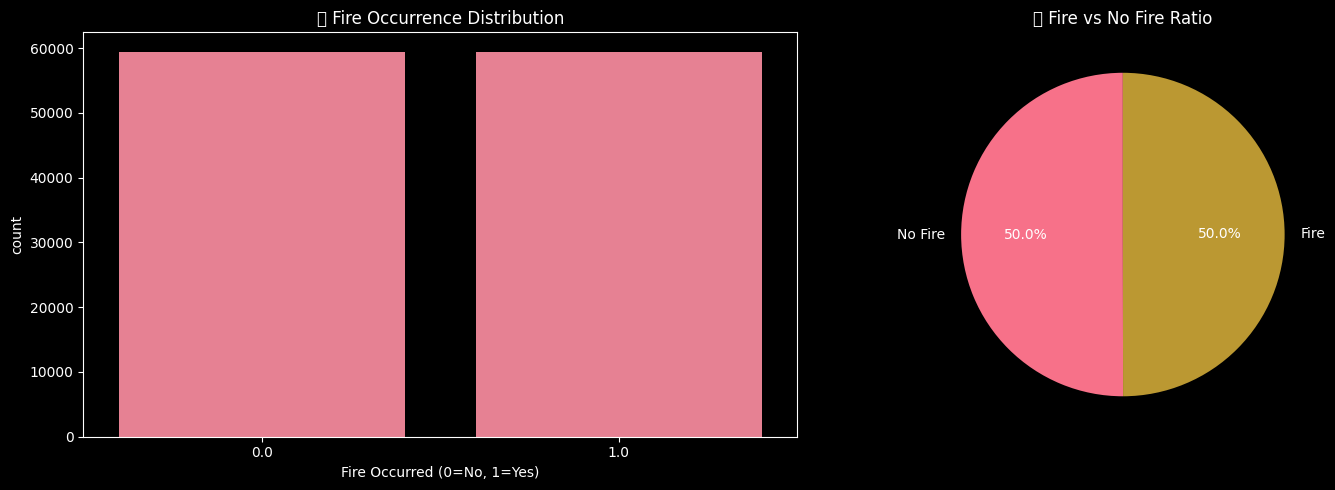

In [5]:
# Analyze target variable (fire occurrence)
target_col = 'occured'

print(f"🎯 Target Variable Analysis - '{target_col}':")
print(df[target_col].value_counts())
print(f"\n📊 Class Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(data=df, x=target_col, ax=axes[0])
axes[0].set_title('🔥 Fire Occurrence Distribution')
axes[0].set_xlabel('Fire Occurred (0=No, 1=Yes)')

# Pie chart
fire_counts = df[target_col].value_counts()
axes[1].pie(fire_counts.values, labels=['No Fire', 'Fire'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('🔥 Fire vs No Fire Ratio')

plt.tight_layout()
plt.show()

## Feature Distributions

📈 temp_mean: Mean=24.57, Median=25.45, Std=5.50
📈 humidity_min: Mean=24.74, Median=22.00, Std=13.15
📈 humidity_min: Mean=24.74, Median=22.00, Std=13.15
📈 wind_speed_max: Mean=16.66, Median=15.60, Std=5.62
📈 wind_speed_max: Mean=16.66, Median=15.60, Std=5.62
📈 pressure_mean: Mean=948.27, Median=959.77, Std=47.44
📈 pressure_mean: Mean=948.27, Median=959.77, Std=47.44
📈 fire_weather_index: Mean=14.67, Median=10.00, Std=14.32
📈 fire_weather_index: Mean=14.67, Median=10.00, Std=14.32


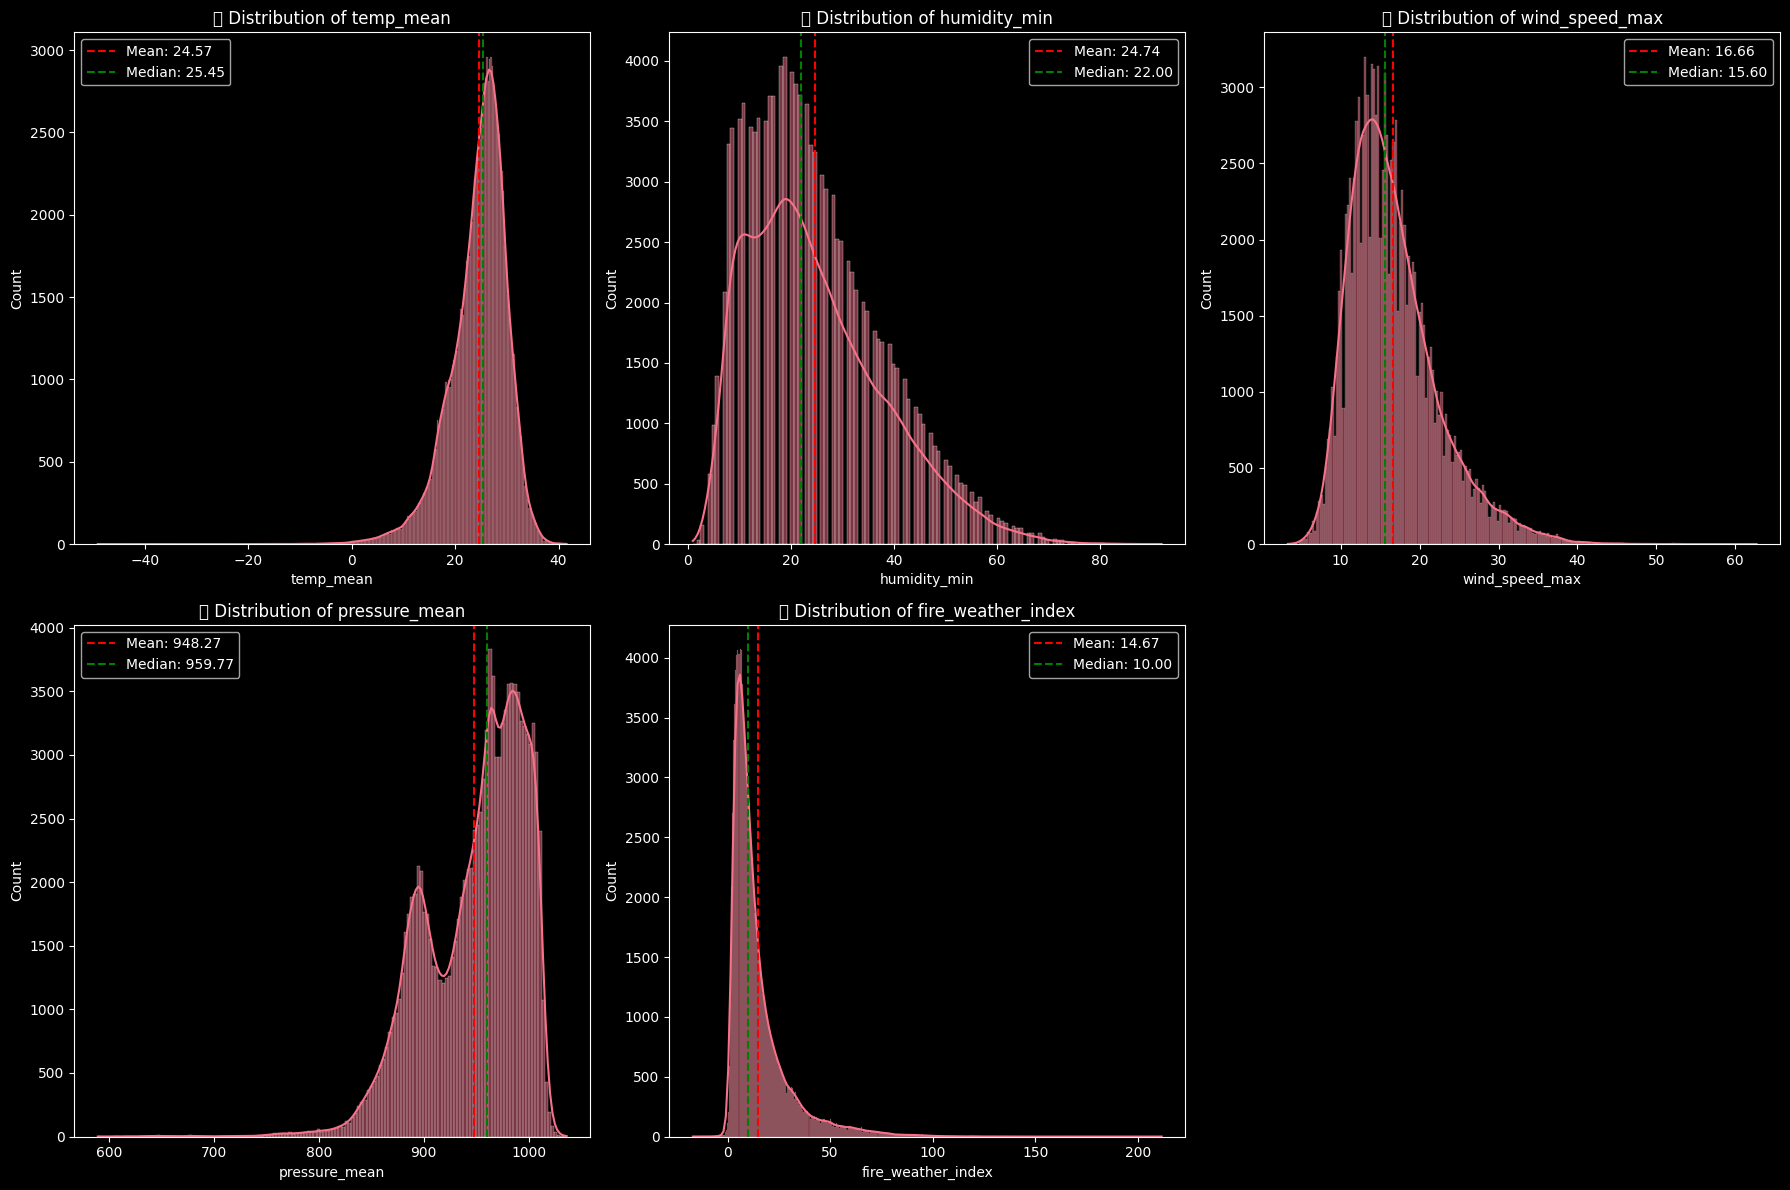

In [6]:
# Analyze key environmental features
key_features = ['temp_mean', 'humidity_min', 'wind_speed_max', 'pressure_mean', 'fire_weather_index']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    if feature in df.columns:
        # Distribution plot
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'📊 Distribution of {feature}')
        axes[i].set_xlabel(feature)
        
        # Add statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        std_val = df[feature].std()
        
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()
        
        print(f"📈 {feature}: Mean={mean_val:.2f}, Median={median_val:.2f}, Std={std_val:.2f}")

# Remove empty subplot
if len(key_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Feature Correlations

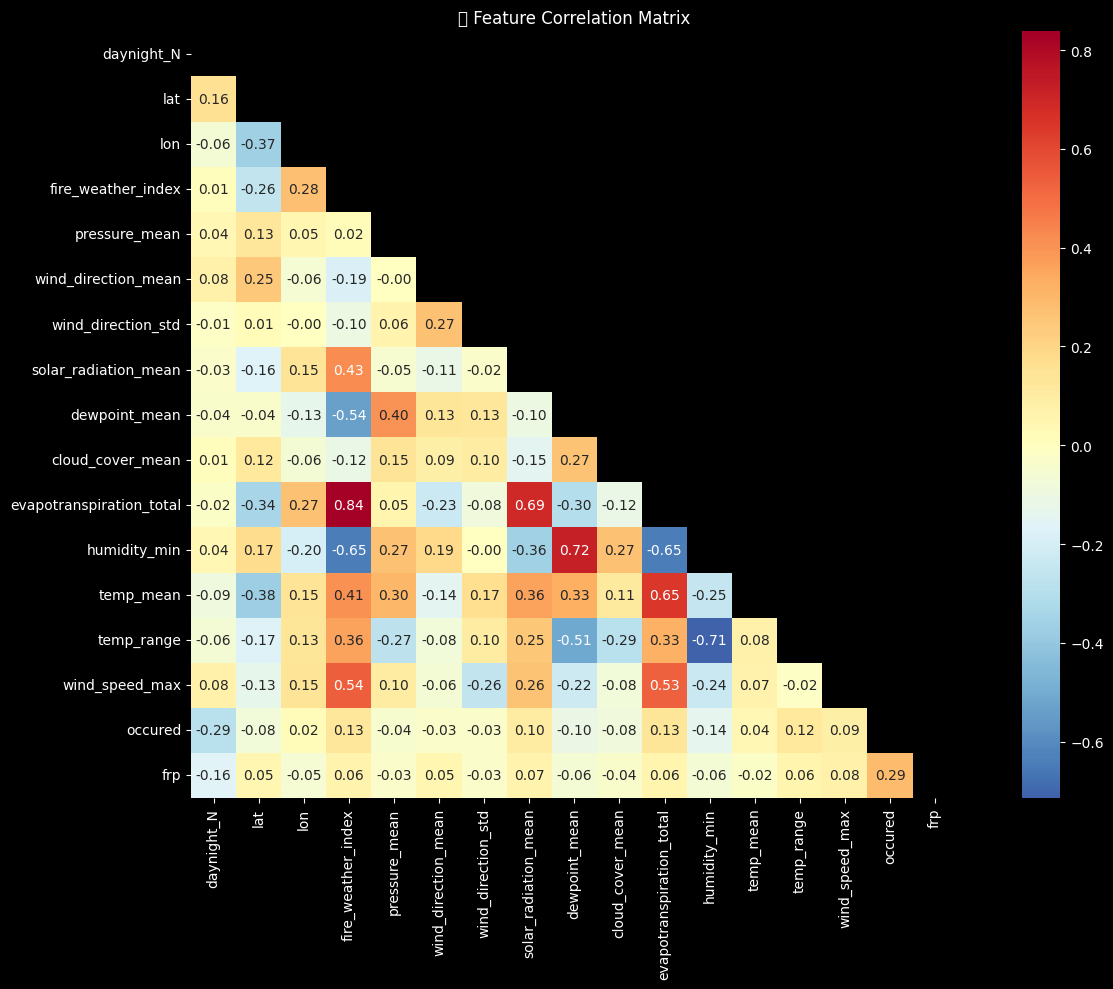


🎯 Strongest correlations with occured:
occured                     1.000000
daynight_N                  0.293408
frp                         0.289721
humidity_min                0.137935
evapotranspiration_total    0.129994
fire_weather_index          0.127266
temp_range                  0.119015
dewpoint_mean               0.104371
solar_radiation_mean        0.103272
wind_speed_max              0.086547
Name: occured, dtype: float64


In [7]:
# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            mask=mask,
            square=True,
            fmt='.2f')
plt.title('🔗 Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find strong correlations with target
target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
print(f"\n🎯 Strongest correlations with {target_col}:")
print(target_correlations.head(10))

## Feature Relationships with Target

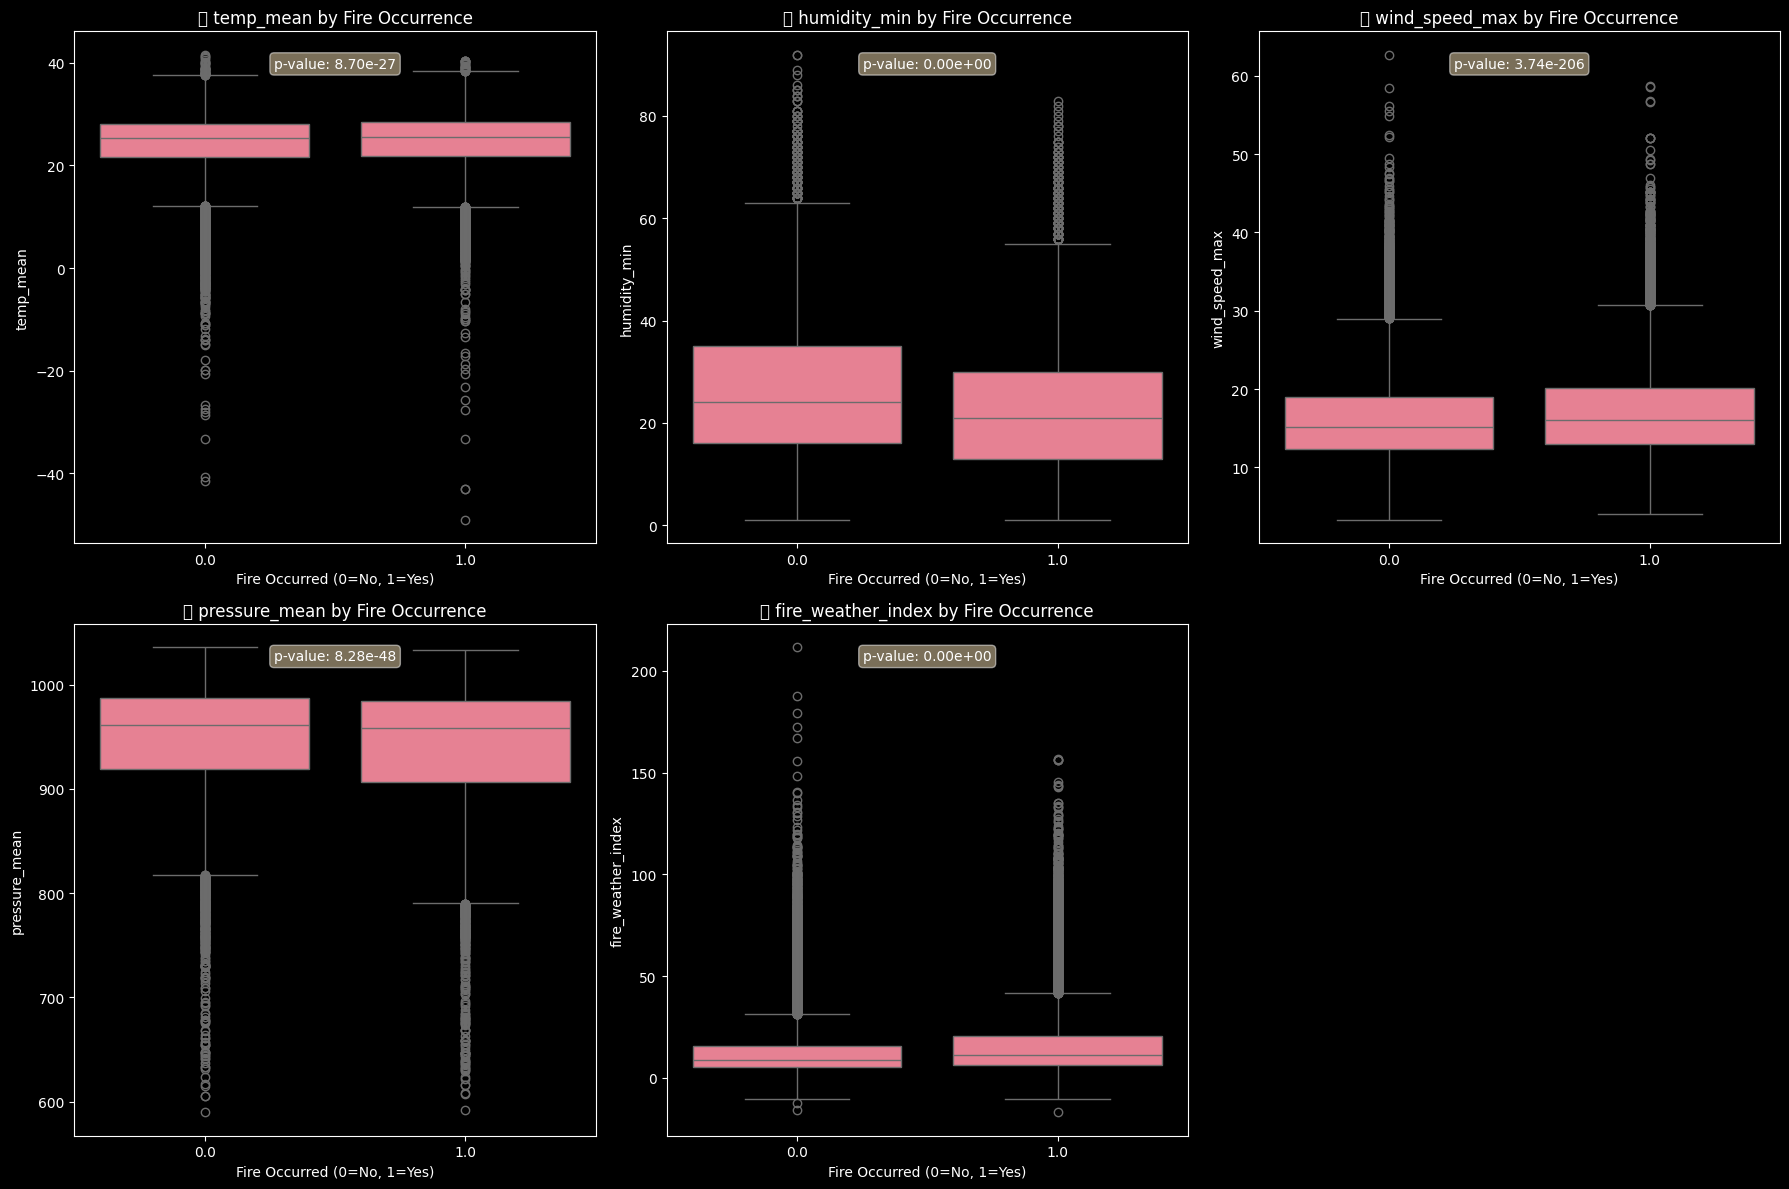

In [8]:
# Box plots comparing features by fire occurrence
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    if feature in df.columns:
        sns.boxplot(data=df, x=target_col, y=feature, ax=axes[i])
        axes[i].set_title(f'📦 {feature} by Fire Occurrence')
        axes[i].set_xlabel('Fire Occurred (0=No, 1=Yes)')
        
        # Statistical test
        fire_vals = df[df[target_col] == 1][feature].dropna()
        no_fire_vals = df[df[target_col] == 0][feature].dropna()
        
        # Mann-Whitney U test (non-parametric)
        statistic, p_value = stats.mannwhitneyu(fire_vals, no_fire_vals, alternative='two-sided')
        
        # Add p-value to plot
        axes[i].text(0.5, 0.95, f'p-value: {p_value:.2e}', 
                    transform=axes[i].transAxes, 
                    ha='center', va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplot
if len(key_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Geographical Analysis

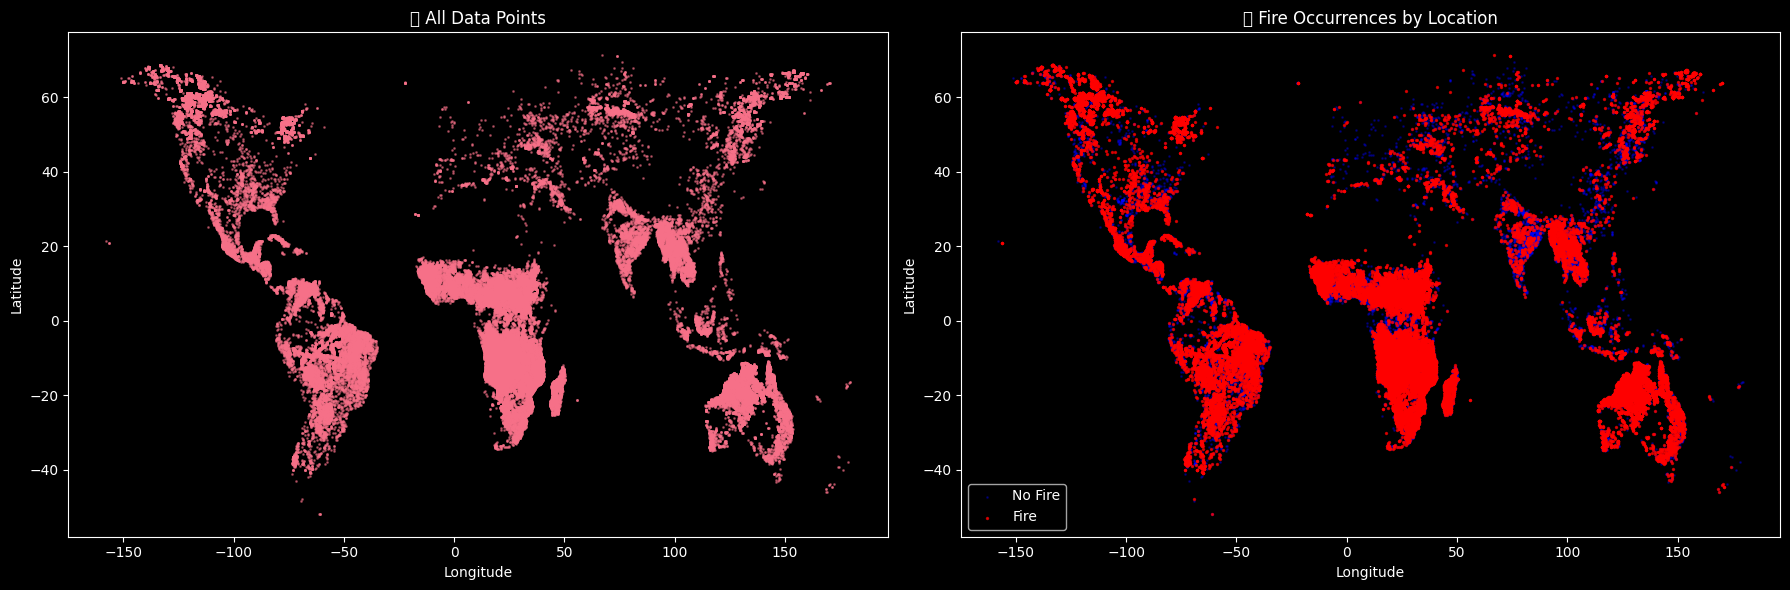

🌍 Geographical Range:
Latitude: -51.78 to 71.23
Longitude: -158.04 to 179.58


In [9]:
# Geographical distribution of fires
if 'lat' in df.columns and 'lon' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # All points
    axes[0].scatter(df['lon'], df['lat'], alpha=0.5, s=1)
    axes[0].set_title('🌍 All Data Points')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    
    # Fire points highlighted
    fire_data = df[df[target_col] == 1]
    no_fire_data = df[df[target_col] == 0]
    
    axes[1].scatter(no_fire_data['lon'], no_fire_data['lat'], alpha=0.3, s=1, c='blue', label='No Fire')
    axes[1].scatter(fire_data['lon'], fire_data['lat'], alpha=0.7, s=2, c='red', label='Fire')
    axes[1].set_title('🔥 Fire Occurrences by Location')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"🌍 Geographical Range:")
    print(f"Latitude: {df['lat'].min():.2f} to {df['lat'].max():.2f}")
    print(f"Longitude: {df['lon'].min():.2f} to {df['lon'].max():.2f}")
else:
    print("🌍 No geographical coordinates found in dataset")

## Outlier Detection

In [10]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("🔍 Outlier Analysis:")
outlier_summary = []

for feature in key_features:
    if feature in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, feature)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Feature': feature,
            'Outlier Count': outlier_count,
            'Percentage': f"{outlier_percentage:.2f}%",
            'Lower Bound': f"{lower:.2f}",
            'Upper Bound': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

🔍 Outlier Analysis:
              Feature  Outlier Count Percentage Lower Bound Upper Bound
0           temp_mean           3338      2.81%       12.01       37.93
1        humidity_min           1358      1.14%      -12.00       60.00
2      wind_speed_max           3735      3.14%        2.50       29.70
3       pressure_mean            693      0.58%      802.96     1095.62
4  fire_weather_index           8855      7.45%      -12.47       36.26


## Summary & Insights

In [11]:
# Generate summary insights
print("📋 DATA EXPLORATION SUMMARY")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"  • Total records: {len(df):,}")
print(f"  • Total features: {len(df.columns)}")
print(f"  • Fire incidents: {df[target_col].sum():,} ({(df[target_col].mean()*100):.1f}%)")
print(f"  • No-fire cases: {(df[target_col] == 0).sum():,} ({((df[target_col] == 0).mean()*100):.1f}%)")

print(f"\n🔗 Key Correlations with Fire Occurrence:")
strong_correlations = target_correlations[target_correlations.abs() > 0.1]
for feature, corr in strong_correlations.items():
    if feature != target_col:
        print(f"  • {feature}: {corr:.3f}")

print(f"\n🎯 Data Quality:")
print(f"  • Missing values: {df.isnull().sum().sum()} ({(df.isnull().sum().sum()/(len(df)*len(df.columns))*100):.2f}%)")
print(f"  • Duplicate rows: {df.duplicated().sum()}")

print(f"\n✅ EDA Complete! Ready for preprocessing and modeling.")

📋 DATA EXPLORATION SUMMARY

📊 Dataset Overview:
  • Total records: 118,858
  • Total features: 17
  • Fire incidents: 59,452.0 (50.0%)
  • No-fire cases: 59,406 (50.0%)

🔗 Key Correlations with Fire Occurrence:
  • daynight_N: 0.293
  • frp: 0.290
  • humidity_min: 0.138
  • evapotranspiration_total: 0.130
  • fire_weather_index: 0.127
  • temp_range: 0.119
  • dewpoint_mean: 0.104
  • solar_radiation_mean: 0.103

🎯 Data Quality:
  • Missing values: 0 (0.00%)
  • Duplicate rows: 0

✅ EDA Complete! Ready for preprocessing and modeling.
